In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('https://storage.googleapis.com/the_public_bucket/wine-clustering.csv')

## ¿Qué sucederá si no estandarizamos los datos?

### Aplicamos clusterización

### Aplicamos el método del codo y silhouette_score para identificar el número adecuado de k

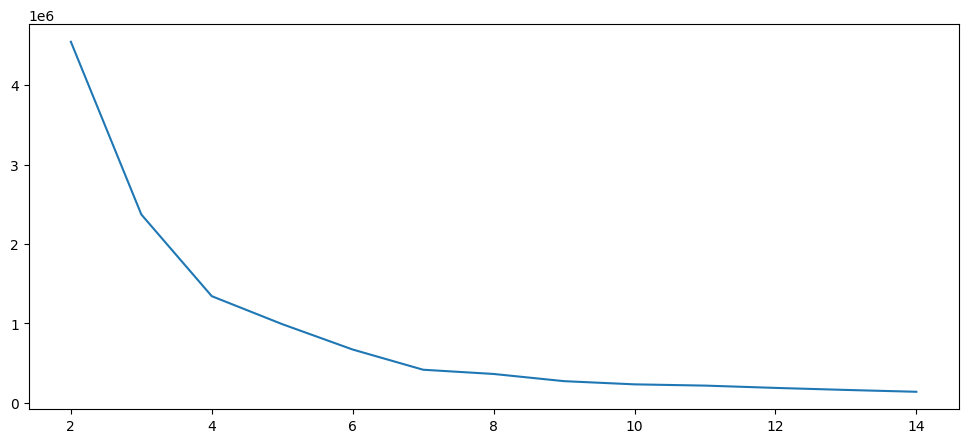

In [3]:
SSD = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    SSD.append(km.inertia_)
plt.figure(figsize=(12,5))
plt.plot(K,SSD)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()


El gráfico nos dice que el ideal debería ser 4 

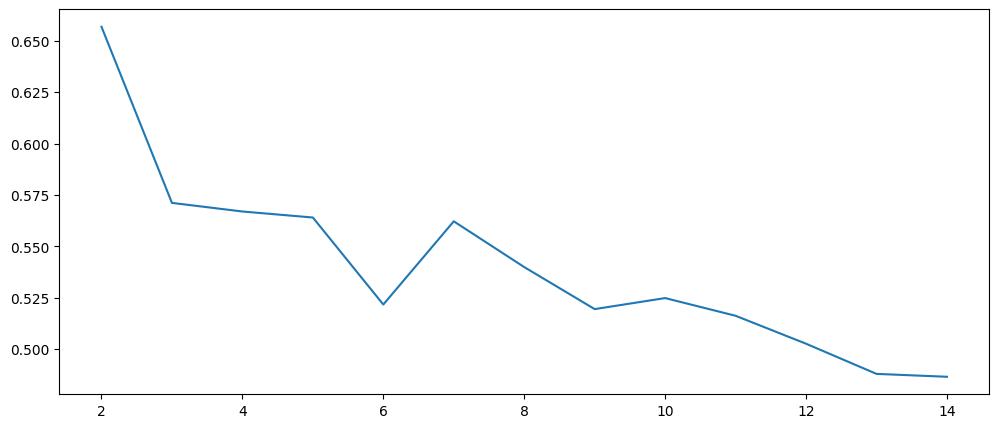

In [4]:
silhouette_scores= []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    y = km.predict(df)
    silhouette_scores.append(silhouette_score(df,y))
plt.figure(figsize=(12,5))
plt.plot(K,silhouette_scores)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()

El gráfico nos dice que el score más alto es el 2 y luego el 3

### Al parecer el **Silhouette Score** es diferente al resultado del **Elbow**

:(

## ¡¡Ahora intentemos con estandarización!!

In [5]:
df.var()

Alcohol                     0.659062
Malic_Acid                  1.248015
Ash                         0.075265
Ash_Alcanity               11.152686
Magnesium                 203.989335
Total_Phenols               0.391690
Flavanoids                  0.997719
Nonflavanoid_Phenols        0.015489
Proanthocyanins             0.327595
Color_Intensity             5.374449
Hue                         0.052245
OD280                       0.504086
Proline                 99166.717355
dtype: float64

hay variables que tiene varianzas muy diferentes, es necesario escalar las variables porque sino todas estarían influenciadas por el Proline que tiene una varianza demasiado alta

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
scaled_data = pd.DataFrame(scaled_data, columns=df.columns)
scaled_data.describe()

Alcohol  Malic_Acid     Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
count  178.000     178.000 178.000       178.000    178.000        178.000   
mean    -0.000      -0.000  -0.000        -0.000     -0.000          0.000   
std      1.003       1.003   1.003         1.003      1.003          1.003   
min     -2.434      -1.433  -3.679        -2.671     -2.088         -2.107   
25%     -0.788      -0.659  -0.572        -0.689     -0.824         -0.885   
50%      0.061      -0.423  -0.024         0.002     -0.122          0.096   
75%      0.836       0.670   0.698         0.602      0.510          0.809   
max      2.260       3.109   3.156         3.155      4.371          2.540   

       Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
count     178.000               178.000          178.000          178.000   
mean       -0.000                 0.000           -0.000            0.000   
std         1.003                 1.003            1.003            1.003   
min        -1.696                -1.868           -2.069           -1.634   
25%        -0.828                -0.740           -0.597           -0.795   
50%         0.106                -0.176           -0.063           -0.159   
75%         0.849                 0.610            0.629            0.494   
max         3.063                 2.402            3.485            3.435   

          Hue   OD280  Proline  
count 178.000 178.000  178.000  
mean    0.000   0.000   -0.000  
std     1.003   1.003    1.003  
min    -2.095  -1.895   -1.493  
25%    -0.768  -0.952   -0.785  
50%     0.033   0.238   -0.234  
75%     0.713   0.789    0.758  
max     3.302   1.961    2.971

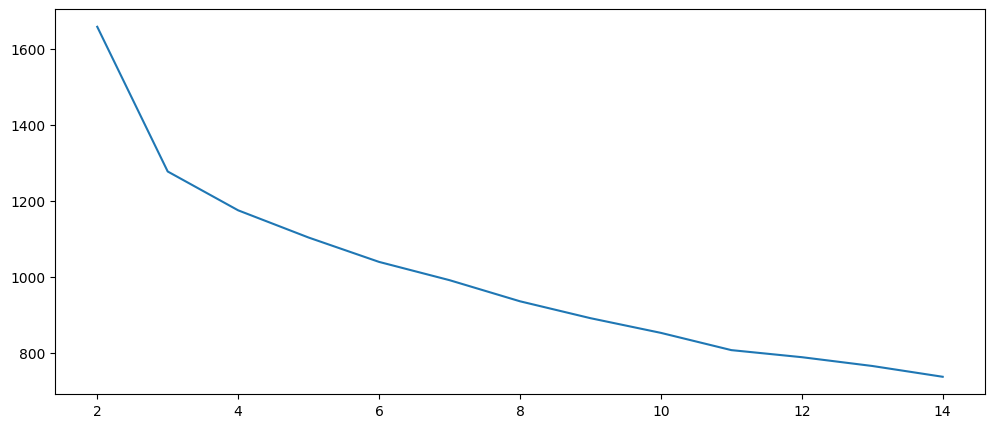

In [7]:
SSD = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k,random_state=3,n_init=20)
    km = km.fit(scaled_data)
    SSD.append(km.inertia_)
plt.figure(figsize=(12,5))
plt.plot(K,SSD)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()

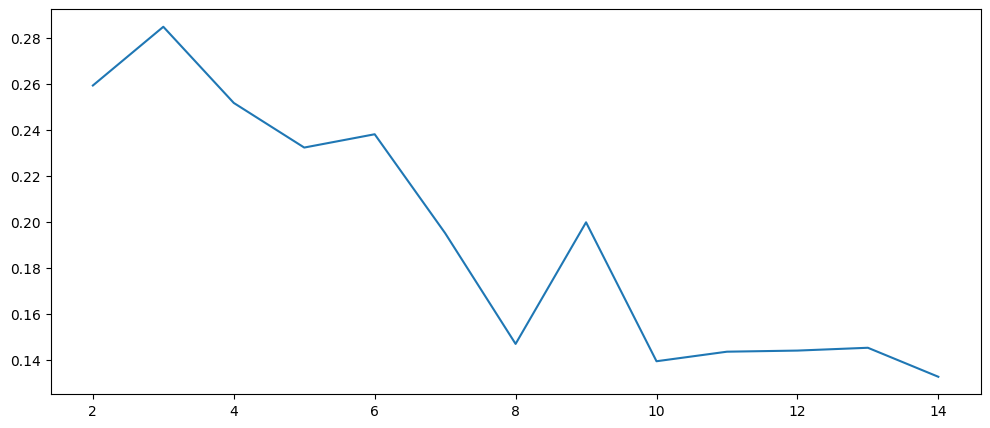

In [8]:
silhouette_scores= []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k,random_state=3,n_init=20)
    km = km.fit(scaled_data)
    y = km.predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data,y))
plt.figure(figsize=(12,5))
plt.plot(K,silhouette_scores)
#plt.xticks(np.arange(min(K), max(K)+1, 1))
plt.show()

Aplicamos random_state para el cluster sea reproducible y n_init=20 para obtener el óptimo centroide 

## ¡¡Ahora sí nos cuadra ambos metodos!!

### 👉El número ideal de clusters es 3

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans.fit_predict(scaled_data)
scaled_data['cluster'] = kmeans.labels_
scaled_data

Alcohol  Malic_Acid    Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      1.519      -0.562  0.232        -1.170      1.914          0.809   
1      0.246      -0.499 -0.828        -2.491      0.018          0.569   
2      0.197       0.021  1.109        -0.269      0.088          0.809   
3      1.692      -0.347  0.488        -0.809      0.931          2.491   
4      0.296       0.228  1.840         0.452      1.282          0.809   
..       ...         ...    ...           ...        ...            ...   
173    0.876       2.975  0.305         0.302     -0.333         -0.986   
174    0.493       1.413  0.415         1.053      0.159         -0.793   
175    0.333       1.745 -0.389         0.152      1.422         -1.130   
176    0.209       0.228  0.013         0.152      1.422         -1.034   
177    1.395       1.583  1.365         1.503     -0.263         -0.393   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0         1.035                -0.660            1.225            0.252   
1         0.734                -0.821           -0.545           -0.293   
2         1.216                -0.498            2.136            0.269   
3         1.467                -0.982            1.032            1.186   
4         0.663                 0.227            0.401           -0.319   
..          ...                   ...              ...              ...   
173      -1.425                 1.274           -0.930            1.143   
174      -1.284                 0.549           -0.317            0.970   
175      -1.345                 0.549           -0.422            2.224   
176      -1.355                 1.355           -0.229            1.835   
177      -1.274                 1.597           -0.422            1.792   

       Hue  OD280  Proline  cluster  
0    0.362  1.848    1.013        0  
1    0.406  1.113    0.965        0  
2    0.318  0.789    1.395        0  
3   -0.428  1.184    2.335        0  
4    0.362  0.450   -0.038        0  
..     ...    ...      ...      ...  
173 -1.393 -1.231   -0.022        1  
174 -1.130 -1.485    0.010        1  
175 -1.612 -1.485    0.281        1  
176 -1.568 -1.401    0.296        1  
177 -1.524 -1.429   -0.595        1  

[178 rows x 14 columns]

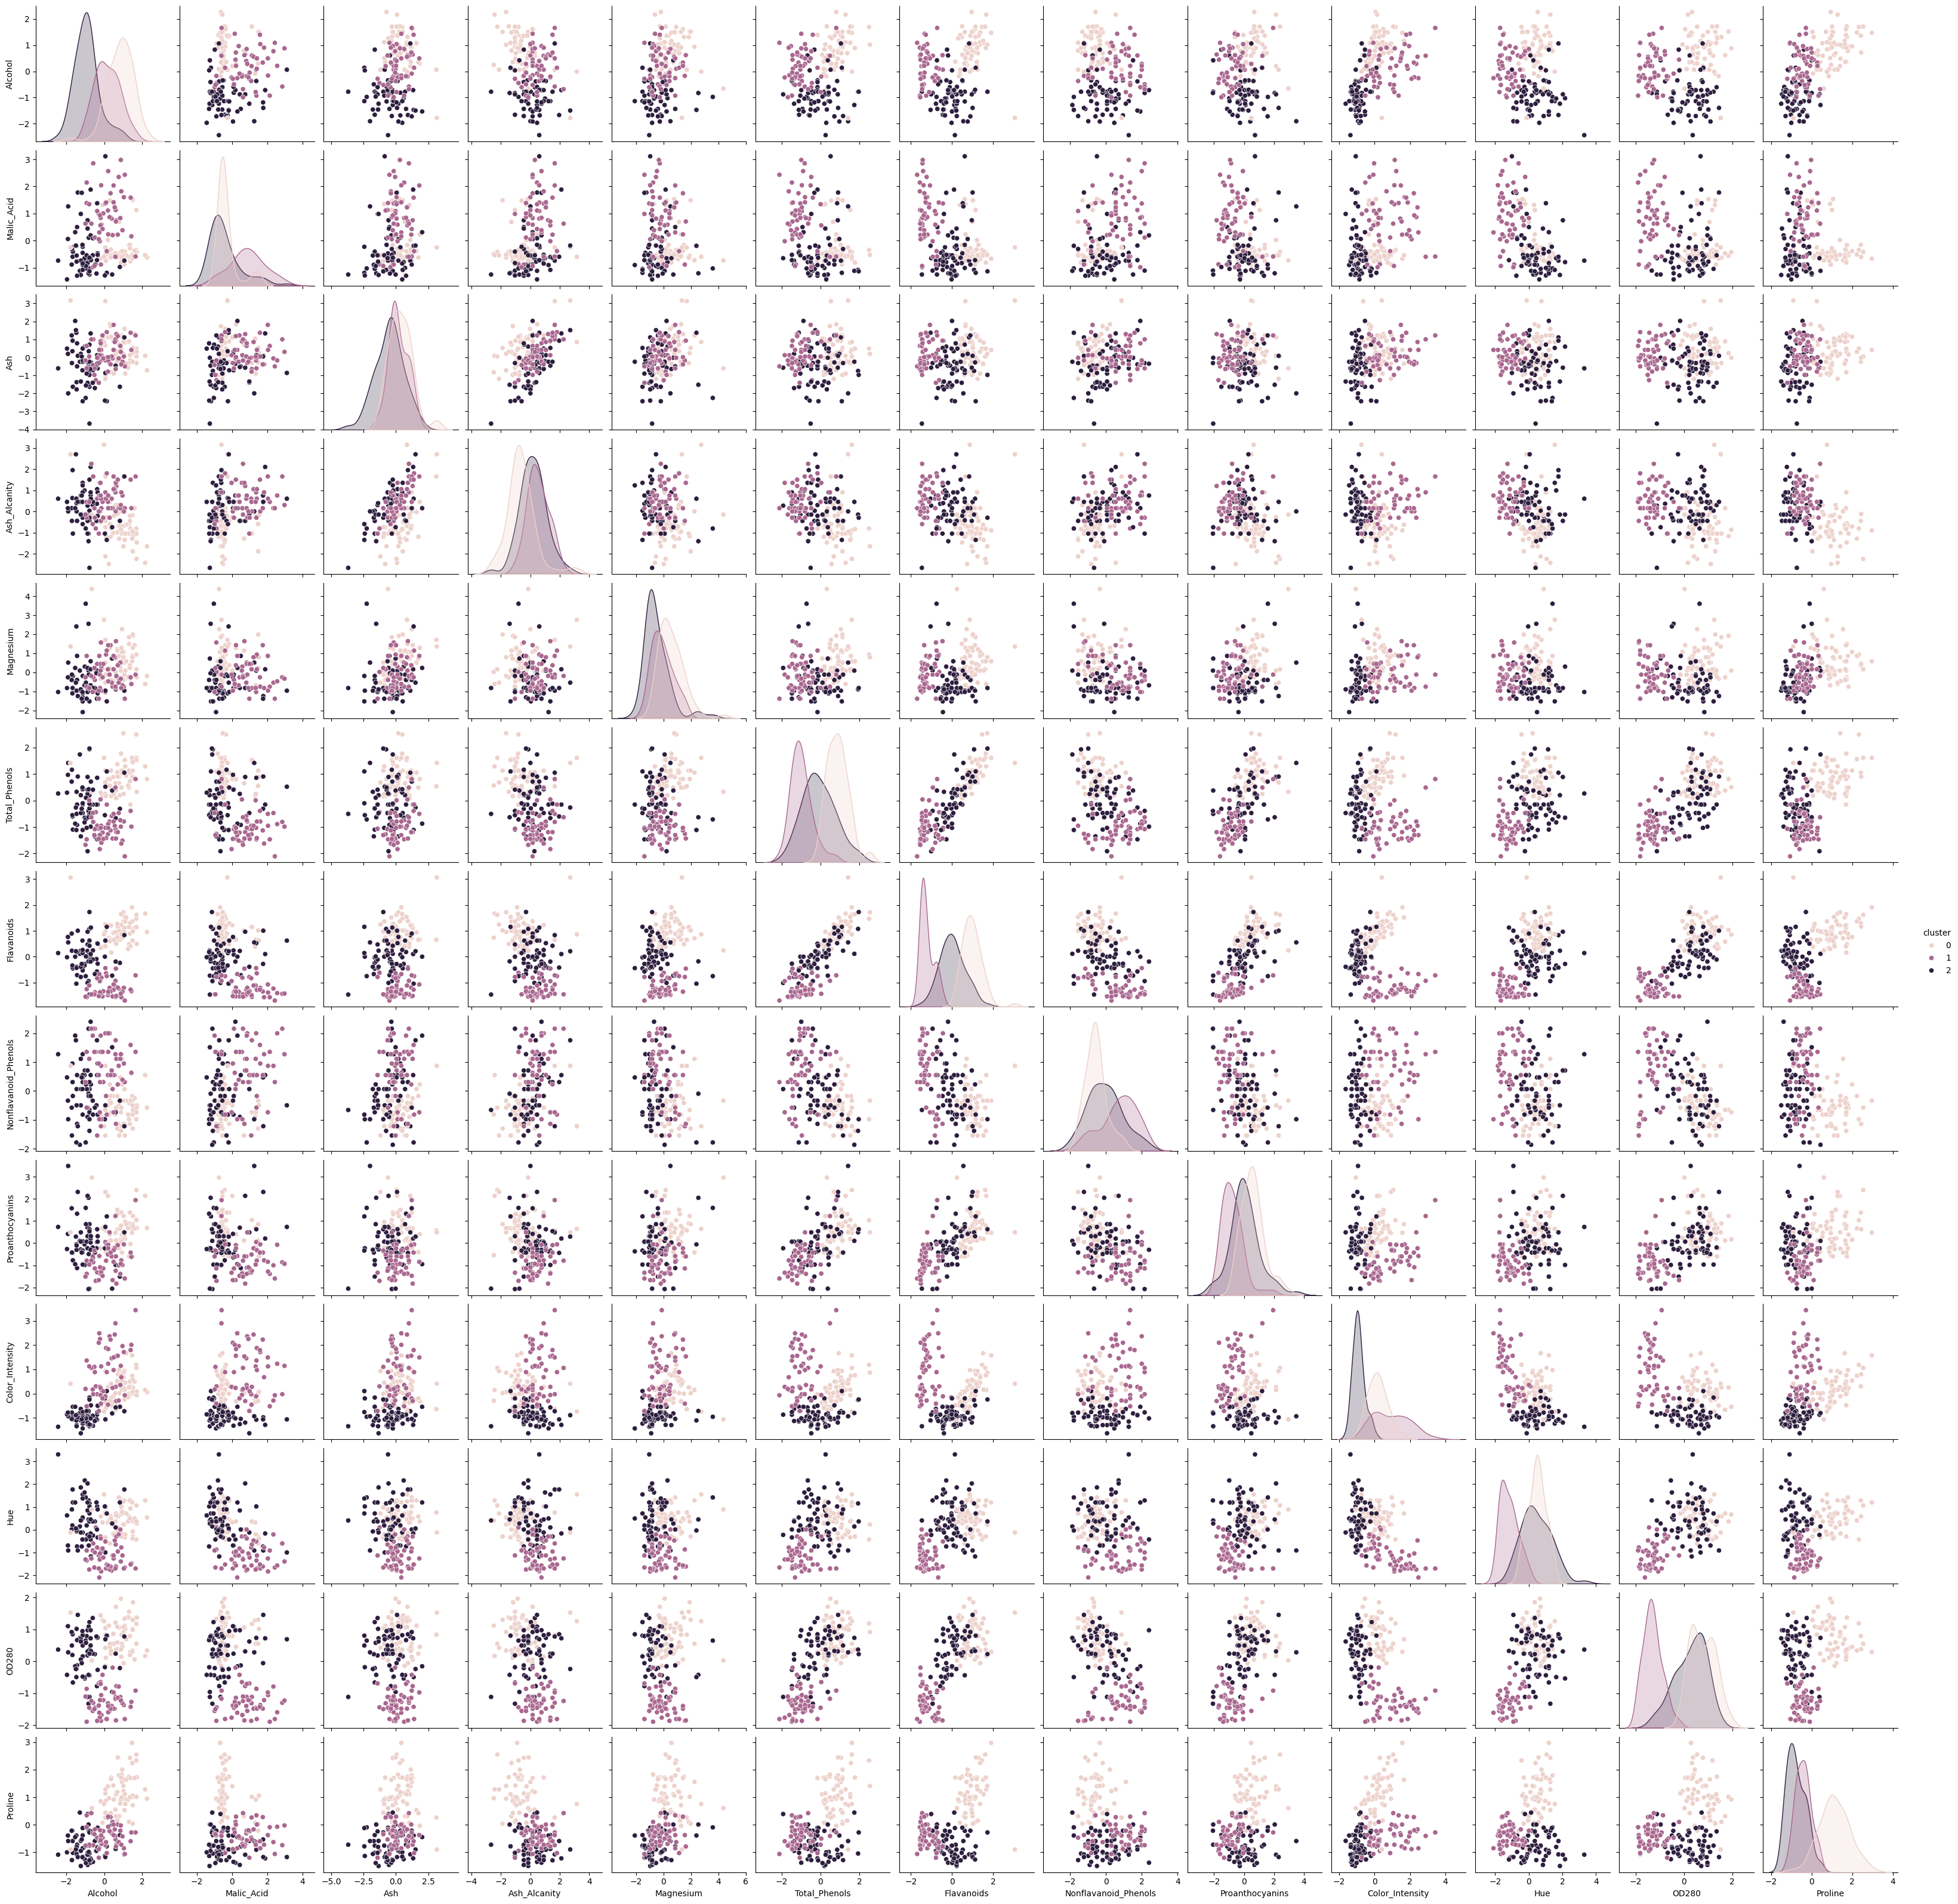

In [10]:
sns.pairplot(scaled_data,hue='cluster')

# Pero, ¿Podemos mejorarlo y hacerlo más divertido?

## Por supuesto, utilicemos **PCA**

PCA nos ayuda a reducir la dimensionalidad de nuestros datos, lo cual nos ayuda muchísimo con el aprendizaje no supervisado. En este caso, al tener 13 atributos, visualizar la información es un poco confusa. PCA nos ayudará a reducir la dimensionalidad de nuestro dataset

Es importante que para utilizar PCA, utilicemos antes la estandarización de los datos

In [11]:
del scaled_data['cluster']

In [12]:
pca = PCA()
pca.fit(scaled_data)
pca_data_scaled = pca.transform(scaled_data)
pca_data_scaled

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [13]:
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

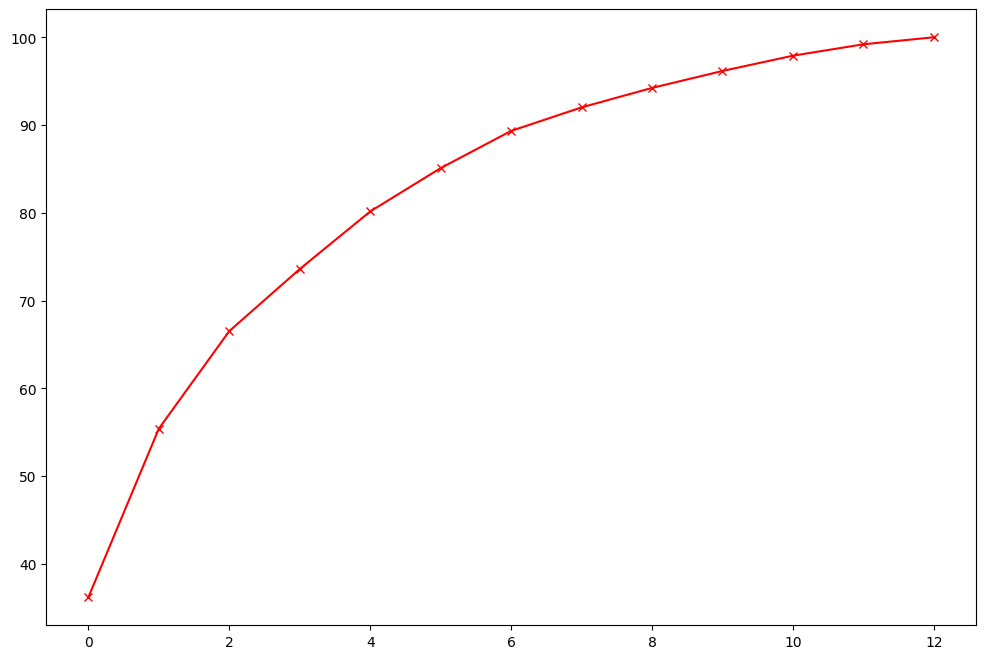

In [14]:
cum_var = np.cumsum(np.round(var,decimals=4)*100)
plt.figure(figsize=(12,8))
plt.plot(cum_var,'r-x')
plt.show()

Como se puede apreciar en la figura, con 6 dimensiones podemos explicar casi el 90% de la varianza de los datos. Eso significa que hemos logrado reducir casi la mitad de los atributos con esta técnica

In [15]:
pca_data = pd.DataFrame(pca_data_scaled)
pca_data.drop([6,7,8,9,10,11,12],axis=1,inplace=True)

In [16]:
pca_data

0      1      2      3      4      5
0    3.317 -1.443 -0.166 -0.216  0.693 -0.224
1    2.209  0.333 -2.026 -0.291 -0.258 -0.927
2    2.517 -1.031  0.983  0.725 -0.251  0.549
3    3.757 -2.756 -0.176  0.568 -0.312  0.114
4    1.009 -0.870  2.027 -0.410  0.298 -0.407
..     ...    ...    ...    ...    ...    ...
173 -3.371 -2.216 -0.343  1.059 -0.574 -1.109
174 -2.602 -1.757  0.208  0.349  0.255 -0.026
175 -2.678 -2.761 -0.941  0.312  1.271  0.273
176 -2.387 -2.297 -0.551 -0.688  0.814  1.179
177 -3.209 -2.769  1.014  0.597 -0.895  0.296

[178 rows x 6 columns]

In [17]:
SSD = []
silhouette_scores= []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k,random_state=3,n_init=20)
    y = km.fit_predict(pca_data)
    silhouette_scores.append(silhouette_score(pca_data,y))
    SSD.append(km.inertia_)

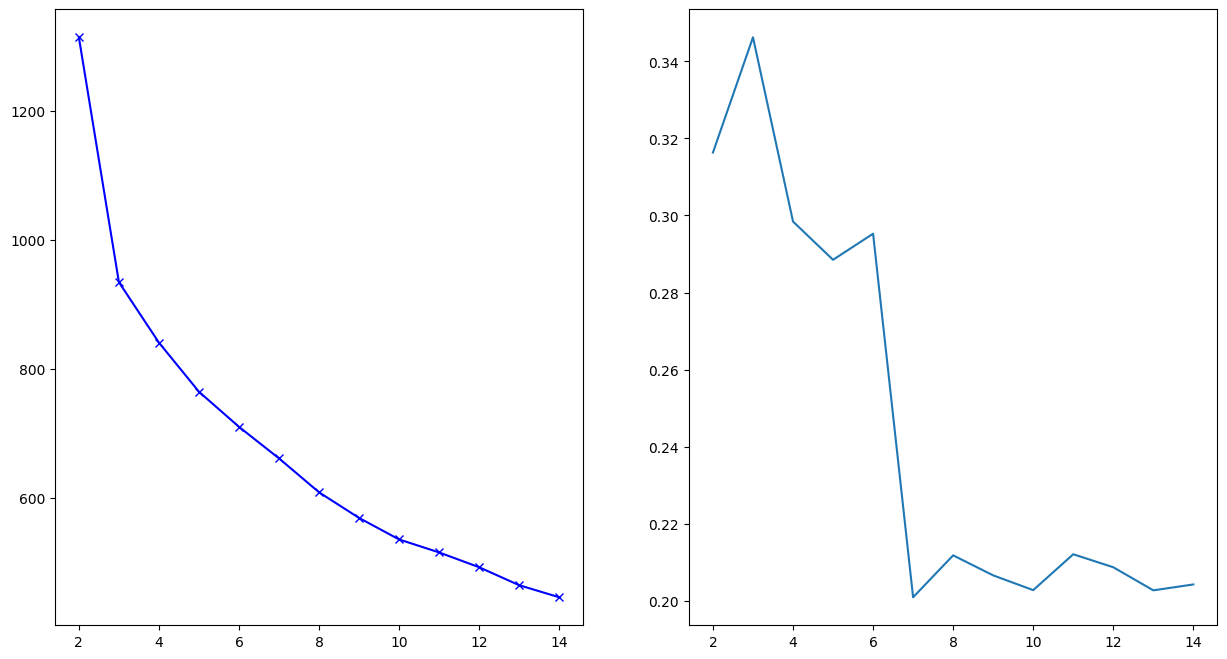

In [18]:
fig, axes = plt.subplots(1,2,figsize=(15,8))
axes[0].plot(K,SSD,'bx-')
axes[1].plot(K,silhouette_scores)
plt.show()

Utilizando PCA, el Silhouette Score es mejor que sin PCA.

In [19]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(pca_data)
print(silhouette_score(pca_data,y))  ## Con PCA

0.34720290584408053


In [20]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(scaled_data)
print(silhouette_score(scaled_data,y)) ## Sin PCA

0.2828367184667964


Podemos observar que el silhouette_score ha mejorado gracias al PCA 

In [21]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(scaled_data)
df['kmeans'] = y

In [22]:
kmeans = KMeans(n_clusters=3)
y = kmeans.fit_predict(pca_data)
df['kmeans_pca'] = y

In [23]:
df

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0     14.230       1.710 2.430        15.600        127          2.800   
1     13.200       1.780 2.140        11.200        100          2.650   
2     13.160       2.360 2.670        18.600        101          2.800   
3     14.370       1.950 2.500        16.800        113          3.850   
4     13.240       2.590 2.870        21.000        118          2.800   
..       ...         ...   ...           ...        ...            ...   
173   13.710       5.650 2.450        20.500         95          1.680   
174   13.400       3.910 2.480        23.000        102          1.800   
175   13.270       4.280 2.260        20.000        120          1.590   
176   13.170       2.590 2.370        20.000        120          1.650   
177   14.130       4.100 2.740        24.500         96          2.050   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0         3.060                 0.280            2.290            5.640 1.040   
1         2.760                 0.260            1.280            4.380 1.050   
2         3.240                 0.300            2.810            5.680 1.030   
3         3.490                 0.240            2.180            7.800 0.860   
4         2.690                 0.390            1.820            4.320 1.040   
..          ...                   ...              ...              ...   ...   
173       0.610                 0.520            1.060            7.700 0.640   
174       0.750                 0.430            1.410            7.300 0.700   
175       0.690                 0.430            1.350           10.200 0.590   
176       0.680                 0.530            1.460            9.300 0.600   
177       0.760                 0.560            1.350            9.200 0.610   

     OD280  Proline  kmeans  kmeans_pca  
0    3.920     1065       1           2  
1    3.400     1050       1           2  
2    3.170     1185       1           2  
3    3.450     1480       1           2  
4    2.930      735       1           2  
..     ...      ...     ...         ...  
173  1.740      740       0           1  
174  1.560      750       0           1  
175  1.560      835       0           1  
176  1.620      840       0           1  
177  1.600      560       0           1  

[178 rows x 15 columns]